In [32]:
# Vamos começar importando as bibliotecas iniciais necessárias para realizar nosso projeto.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 1 - Análise Exploratória e Estatística

Vamos começar carregando nosso conjunto de dados para visualizar as primeiras informações sobre eles.

In [33]:
# Carrega o conjunto de dados
california_housing = fetch_california_housing()

# Imprime informações sobre o conjunto de dados
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
# Criar DataFrame com os dados e rótulos
california_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
california_df['target1'] = california_housing.target

# Aplicar a fórmula diretamente à coluna 'target' para visualizar o valor real das casas.
california_df['target'] = california_df['target1'] * 100000

# Excluir a coluna 'target1'
california_df.drop('target1', axis=1, inplace=True)

# Exibir os primeiros e últimos registros do DataFrame
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [35]:
# Obter informações sobre cada coluna do dataset
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
# Obter informações estatísticas das colunas numéricas do dataframe
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


In [37]:
# Verificar se nosso dataframe possui alguma coluna com valores vazios
california_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

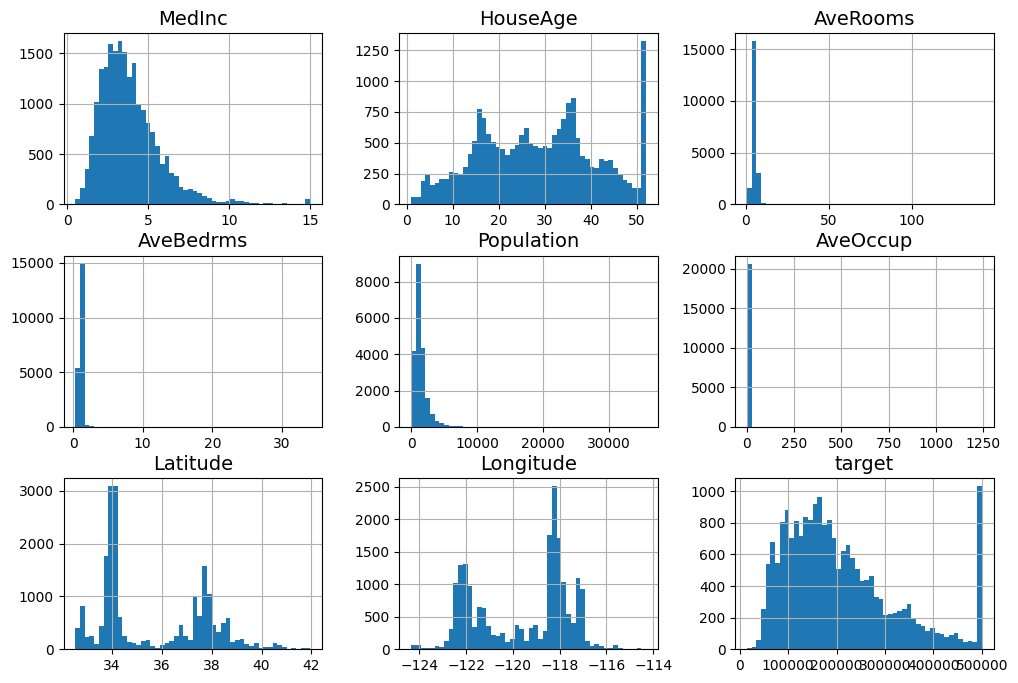

In [38]:
# Utilizar matplotlib para visualizar de forma gráfica como os dados estão distribuídos em cada coluna do dataframe.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

california_df.hist(bins=50, figsize=(12, 8))
plt.show()

Vamos agora procurar correlações entre as colunas do nosso dataframe e a variável alvo.

In [39]:
# Vamos verificar as correlações com a variável 'target'.
corr_matrix = california_df.corr(numeric_only=True)
corr_matrix["target"].sort_values(ascending=False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

MedInc é a categoria mais correlacionada com o target.

A seguir, vamos criar a variável "income_cat", para possibilitar uma divisão estratificada dos dados. 

Essa variável será responsável por dividir os valores de "MedInc" em 5 categorias diferentes.

Cada categoria irá armazenar uma faixa de salário(Income).

In [40]:
california_df["income_cat"] = pd.cut(california_df["MedInc"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

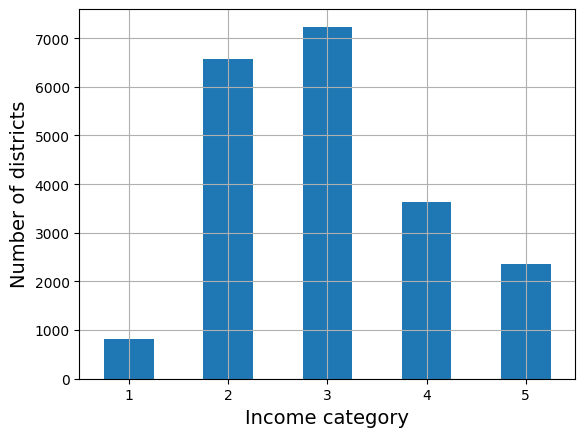

In [41]:
california_df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Agora vamos criar uma divisão estratificada do conjunto "california_df" utilizando a coluna "income_cat" como referência.

A divisão estratificada vai separar uma quantidade de dados proporcionais representativa de acordo com os valores de "income_cat".



In [42]:
strat_train_set, strat_test_set = train_test_split(
    california_df, test_size=0.2, stratify=california_df["income_cat"], random_state=42)

In [43]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Acima podemos ver como ficou a distribuição de dados(income_cat) em strat_test_set.

Abaixo vamos excluir a coluna "income_cat", pois o propósito dela de auxiliar na divisão de dados já foi cumprido.

In [44]:
# Dropar a 'income_cat'
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3 - Construção e Teste de Modelos de Machine Learning

Nessa etapa vamos separar nossos dados entre conjuntos de treino e conjuntos de teste.

Vamos criar variáveis padronizadas para utilizar em alguns modelos de Machine Learning sensíveis a escala dos dados.

E então, finalmente iremos construir nossos modelos de machine learning, ajustar, e testar, para verificar seus desempenhos.

In [45]:
# A partir dos conjuntos de dados estratificados vamos definir os conjuntos de treino e os conjuntos de teste.
# Esses conjuntos serão usados para a construção dos nossos modelos de Machine Learning.

X_train = strat_train_set.drop("target", axis=1)
y_train = strat_train_set["target"].copy()
X_test = strat_test_set.drop("target", axis=1)
y_test = strat_test_set["target"].copy()

In [46]:
# Vamos importar o pacote StardandScaler, com a finalidade de padronizar os dados de treinamento. 
# Alguns algoritmos de Machine Learning são sensíveis as escalas de dados.

from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis preditoras do conjunto de treinamento
scaler = StandardScaler()

# Ajustar o scaler ao conjunto de treino e transformar X_train
X_train_scaled = scaler.fit_transform(X_train)

# Usar as mesmas estatísticas para transformar X_test
X_test_scaled = scaler.transform(X_test)

# Ajustar o scaler apenas aos valores únicos da variável alvo (y_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Usar as mesmas estatísticas para transformar y_test
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [47]:
# x_train_df armazena o dataframe de "X_train_scaled"
x_train_df = pd.DataFrame(X_train_scaled)
x_train_df.head()

,0,1,2,3,4,5,6,7
0,-0.893647,0.027564,0.017395,0.060107,0.732602,0.006223,1.347438,-0.941350
1,1.292168,-1.722018,0.569256,0.029314,0.533612,-0.040811,-1.192440,1.171782
2,-0.525434,1.220460,-0.018024,-0.128357,-0.674675,-0.075371,-0.125972,0.267581
3,-0.865929,-0.370069,-0.595140,-0.047102,-0.467617,-0.106803,-1.351474,1.221738
4,0.325752,-0.131489,0.251241,0.030323,0.374060,0.006109,-0.635818,0.437431


Assim ficou nosso dataframe após a aplicação de Standard Scaler.

Note que todos os números agora estão em uma escala muito mais próxima de 0.

<Axes: >

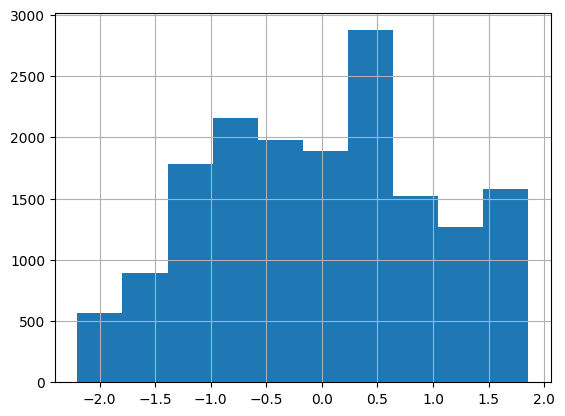

In [48]:
# Vamos visualizar a distribuição de dados de "x_train_df"
pd.DataFrame(x_train_df)[1].hist()

K-Nearest Neighbors (KNN)

In [49]:
# from sklearn.model_selection import cross_val_predict
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import KFold

# # Criar um modelo KNeighborsRegressor
# knn_model = KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')

# # Especificar o número de folds para a validação cruzada
# num_folds = 5 
# # Criar um objeto KFold para dividir os dados
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# # Realizar a validação cruzada e obter as previsões padronizadas
# cross_val_pred_scaled = cross_val_predict(knn_model, X_train_scaled, y_train_scaled, cv=kf)
# # Inverter a padronização para obter as previsões na escala original
# cross_val_pred_original = scaler.inverse_transform(cross_val_pred_scaled)
# # Calcular o RMSE na escala original
# rmse_original = np.sqrt(mean_squared_error(y_train, cross_val_pred_original))

# # Imprimir o resultado
# print(f'RMSE na escala original após validação cruzada: {rmse_original}')

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')
knn_model.fit(X_train_scaled, y_train_scaled)  # Use y_train_scaled em vez de y_train

# Fazer previsões no conjunto de teste
knn_model_pred_scaled = knn_model.predict(X_test_scaled)

# Inverter a padronização para obter as previsões na escala original
knn_model_pred_original = scaler.inverse_transform(knn_model_pred_scaled)

# Avaliar o desempenho do modelo KNeighborsRegressor
knn_mse = mean_squared_error(y_test, knn_model_pred_original)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

57291.36626933032

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Criar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
lm_predictions = model.predict(X_test)

# Agora, vamos realizar a validação cruzada para obter uma estimativa mais robusta do desempenho do modelo
# Criar um objeto KFold para dividir os dados
num_folds = 5  # Pode ajustar conforme necessário
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada e calcular o RMSE para cada fold
cross_val_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))

# Calcular a média do RMSE dos folds
average_cross_val_rmse = np.mean(cross_val_rmse)

# Imprimir o resultado
print(f'Média do RMSE na validação cruzada: {average_cross_val_rmse}')

Média do RMSE na validação cruzada: 81883.32230005926


In [52]:
from sklearn.linear_model import LinearRegression

# Criar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
lm_predictions = model.predict(X_test)

# Avaliar o desempenho do modelo no conjunto de teste
lin_mse = mean_squared_error(y_test, lm_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

71197.82994961065

Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Criar e treinar o modelo Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_model.fit(X_train, y_train)

# Agora, vamos realizar a validação cruzada para obter uma estimativa mais robusta do desempenho do modelo
# Criar um objeto KFold para dividir os dados
num_folds = 5  # Pode ajustar conforme necessário
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada e calcular o RMSE para cada fold
cross_val_rmse = np.sqrt(-cross_val_score(gb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))

# Calcular a média do RMSE dos folds
average_cross_val_rmse = np.mean(cross_val_rmse)

# Imprimir o resultado
print(f'Média do RMSE na validação cruzada: {average_cross_val_rmse}')


Média do RMSE na validação cruzada: 47642.15396674677


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Criar e treinar o modelo Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.2, max_depth = 5, min_samples_split =2, min_samples_leaf = 1, random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
gb_y_pred = gb_model.predict(X_test)

# Avaliar o desempenho do modelo Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_rmse

45712.85555559645

Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Criar e treinar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Agora, vamos realizar a validação cruzada para obter uma estimativa mais robusta do desempenho do modelo
# Criar um objeto KFold para dividir os dados
num_folds = 5  # Pode ajustar conforme necessário
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada e calcular o RMSE para cada fold
cross_val_rmse = np.sqrt(-cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))

# Calcular a média do RMSE dos folds
average_cross_val_rmse = np.mean(cross_val_rmse)

# Imprimir o resultado
print(f'Média do RMSE na validação cruzada: {average_cross_val_rmse}')


Média do RMSE na validação cruzada: 49928.004949895585


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
rf_y_pred = rf_model.predict(X_test)

# Avaliar o desempenho do modelo no conjunto de teste
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

47740.13819738083

Ensemble Model

Vamos combinar os algoritmos Gradient Boosting e Random Forest para criar um Ensemble Model.

In [57]:
from sklearn.ensemble import VotingRegressor

# Criar um ensemble usando VotingRegressor com pesos
ensemble_model = VotingRegressor(estimators=[('gb', gb_model), ('rf', rf_model)], weights=[2, 1])
ensemble_model.fit(X_train, y_train)

# Fazer previsões com o ensemble
ensemble_predictions = ensemble_model.predict(X_test)

# Avaliação do desempenho do ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
print(f'RMSE do Ensemble: {ensemble_rmse}')

RMSE do Ensemble: 44934.82316504352


# 4 - Conclusão

Por último, vamos gerar um gráfico de barras horizontais para comparar a precisão das previsões de cada modelo utilizado.

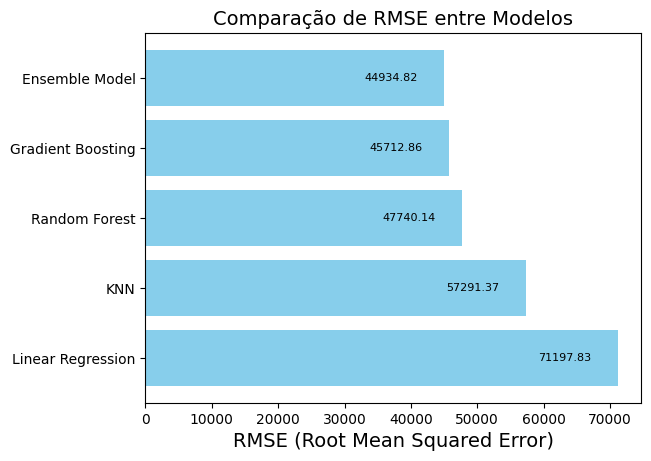

In [58]:
import matplotlib.pyplot as plt

# Nomes dos modelos
model_names = ['Linear Regression', 'KNN', 'Random Forest', 'Gradient Boosting', 'Ensemble Model']

# Valores RMSE correspondentes
rmse_values = [lin_rmse, knn_rmse, rf_rmse, gb_rmse, ensemble_rmse]

# Criar gráfico de barras horizontais
fig, ax = plt.subplots()
bars = ax.barh(model_names, rmse_values, color='skyblue')

# Adicionar rótulos com os valores exatos dentro das barras
for bar, value in zip(bars, rmse_values):
    ax.text(bar.get_width() - 12000, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
            va='center', ha='left', fontsize=8, color='black')

plt.xlabel('RMSE (Root Mean Squared Error)')
plt.title('Comparação de RMSE entre Modelos')
plt.show()

O Ensemble Model se mostrou o melhor modelo dentre os que foram selecionados para esse projeto.